*EXP-1* Implement Sentiment Analysis by a movie

In [5]:
import pandas as pd
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# reading and wragling data
df_avatar = pd.read_csv('/content/avatar.csv',  encoding= 'unicode_escape')
df_avatar_lines = df_avatar.groupby('character').count()
df_avatar_lines = df_avatar_lines.sort_values(by=['character_words'], ascending=False)[:10]
top_character_names = df_avatar_lines.index.values

In [7]:
# filtering out non-top characters
df_character_sentiment = df_avatar[df_avatar['character'].isin(top_character_names)]
df_character_sentiment = df_character_sentiment[['character', 'character_words']]


In [8]:
sid = SentimentIntensityAnalyzer()
df_character_sentiment.reset_index(inplace=True, drop=True)
df_character_sentiment[['neg', 'neu', 'pos', 'compound']] = df_character_sentiment['character_words'].apply(sid.polarity_scores).apply(pd.Series)

In [9]:
df_character_sentiment

,character,character_words,neg,neu,pos,compound
0,Katara,Water. Earth. Fire. Air. My grandmother used t...,0.196,0.735,0.069,-0.9718
1,Sokka,It's not getting away from me this time. Watc...,0.000,1.000,0.000,0.0000
2,Katara,"Sokka, look!",0.000,1.000,0.000,0.0000
3,Sokka,"Sshh! Katara, you're going to scare it away. ...",0.200,0.800,0.000,-0.5411
4,Katara,"But, Sokka! I caught one!",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
10266,Zuko,At least you don't look like a boar-q-pine! My...,0.183,0.817,0.000,-0.4007
10267,Suki,And why did you paint me firebending?,0.000,1.000,0.000,0.0000
10268,Sokka,I thought it looked more exciting that way. O...,0.000,0.687,0.313,0.7501
10269,Iroh,"Hey, my belly's not that big anymore. I've rea...",0.000,1.000,0.000,0.0000


**Exp-2** Implement Named Entity Recognition (NER) in Python with Spacy

In [10]:
import spacy
from spacy import displacy

In [11]:
NER = spacy.load("en_core_web_sm")
raw_text="The Indian Space Research Organisation is the national space agency of India,headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."
text1= NER(raw_text)

In [12]:
for word in text1.ents:
 print(word.text,word.label_)

The Indian Space Research Organisation ORG
India GPE
Bengaluru GPE
Department of Space ORG
India GPE
ISRO ORG
DOS ORG


## Exp No:3

## Implement Stemming & Lemmatization

### Stemming


In [18]:
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
  print("Stem Word for {} is {}".format(w,stemmer.stem(w)))

Stem Word for studies is studi
Stem Word for studying is studi
Stem Word for cries is cri
Stem Word for cry is cri


### Lemmatization

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
  print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))

Lemma for studies is study
Lemma for studying is studying
Lemma for cries is cry
Lemma for cry is cry


--------------------------------------------------------------------------------

## Exp - 4
## Implement Bag of Words

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]
df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(),
                      index=df['review'].values,
                      columns=cv.get_feature_names_out())
df_dtm


,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


#Experiment - 5
#Implement Term Frequency–Inverse Document Frequency(TFIDF)

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["I love writing code in Python. I love Python code",
 "I hate writing code in Java. I hate Java code"]
df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english', norm=None)
tfidf_matrix = tfidf.fit_transform(df['text'])
df_dtm = pd.DataFrame(tfidf_matrix.toarray(),
 index=df['review'].values,
 columns=tfidf.get_feature_names_out())
df_dtm


,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


#Experiment - 6
#Implement Stopwords

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)
print(len(sw_nltk))
text = "When I first met her she was very quiet. She remained quiet during the entire two hour long journey from Stony Brook to New York."
words = [word for word in text.split() if word.lower() not in sw_nltk]
new_text = " ".join(words)
print(new_text)
print("Old length: ", len(text))
print("New length: ", len(new_text))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#Experiment - 7
#To implement POS Tagging.

In [26]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, sent_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [27]:
stop_words = set(stopwords.words('english'))
txt = "Sukanya, Rajib and Naba are my good friends. " \
 "Sukanya is getting married next year. " \
 "Marriage is a big step in one’s life." \
 "It is both exciting and frightening. " \
 "But friendship is a sacred bond between people." \
 "It is a special kind of love between us. " \
 "Many of you must have tried searching for a friend "\
 "but never found the right one."

# sent_tokenize is one of instances of
# PunktSentenceTokenizer from the nltk.tokenize.punkt module
tokenized = sent_tokenize(txt)

for i in tokenized:

 # Word tokenizers is used to find the words
 # and punctuation in a string
 wordsList = nltk.word_tokenize(i)
 # removing stop words from wordList
 wordsList = [w for w in wordsList if not w in stop_words]
 # Using a Tagger. Which is part-of-speech
 # tagger or POS-tagger.
 tagged = nltk.pos_tag(wordsList)
 print(tagged)


[('Sukanya', 'NNP'), (',', ','), ('Rajib', 'NNP'), ('Naba', 'NNP'), ('good', 'JJ'), ('friends', 'NNS'), ('.', '.')]
[('Sukanya', 'NNP'), ('getting', 'VBG'), ('married', 'VBN'), ('next', 'JJ'), ('year', 'NN'), ('.', '.')]
[('Marriage', 'NN'), ('big', 'JJ'), ('step', 'NN'), ('one', 'CD'), ('’', 'NN'), ('life.It', 'NN'), ('exciting', 'VBG'), ('frightening', 'NN'), ('.', '.')]
[('But', 'CC'), ('friendship', 'NN'), ('sacred', 'VBD'), ('bond', 'NN'), ('people.It', 'NN'), ('special', 'JJ'), ('kind', 'NN'), ('love', 'VB'), ('us', 'PRP'), ('.', '.')]
[('Many', 'JJ'), ('must', 'MD'), ('tried', 'VB'), ('searching', 'VBG'), ('friend', 'NN'), ('never', 'RB'), ('found', 'VBD'), ('right', 'JJ'), ('one', 'CD'), ('.', '.')]


#Experiment - 8
#To implement Chunking.

In [28]:
import nltk
sentence = [
 ("the", "DT"),
 ("book", "NN"),
 ("has","VBZ"),
 ("many","JJ"),
 ("chapters","NNS")
]
chunker = nltk.RegexpParser(
 r'''
 NP:{<DT><NN.*><.*>*<NN.*>}
 }<VB.*>{
 '''
)
chunker.parse(sentence)
Output = chunker.parse(sentence)
print(Output)

(S (NP the/DT book/NN) has/VBZ (NP many/JJ chapters/NNS))


#Experiment-9
#To Implement Wordnet

In [29]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
synonyms = []
antonyms = []
for synset in wordnet.synsets("bad"):
 for l in synset.lemmas():
  synonyms.append(l.name())
  if l.antonyms():
    antonyms.append(l.antonyms()[0].name())
print(set(synonyms))
print(set(antonyms))

{'spoiled', 'badly', 'tough', 'unfit', 'bad', 'speculative', 'spoilt', 'unsound', 'forged', 'risky', 'regretful', 'big', 'defective', 'uncollectible', 'badness', 'high-risk', 'sorry'}
{'goodness', 'good', 'unregretful'}


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Experiment - 10
#To implement Word Cloud


 Preprocessed Data:  lionel messi one greatest football players time achieved many remarkable feats career , clubs national team paragraph achievements : lionel messi record seven ballon d'or awards , prestigious individual honor football also six golden shoes , awarded top scorer europe 's top leagues all-time top scorer la liga , 450 goals , uefa champions league , 120 goals 34 trophies fc barcelona , including four champions league titles 10 la liga titles also three fifa club world cups three uefa super cups barcelona 2023 , joined inter miami cf major league soccer , leagues cup first season argentina , copa américa 2021 fifa world cup 2022 , also awarded golden ball best player tournament argentina 's capped player top scorer , 170 appearances 100 goals¹²³⁴


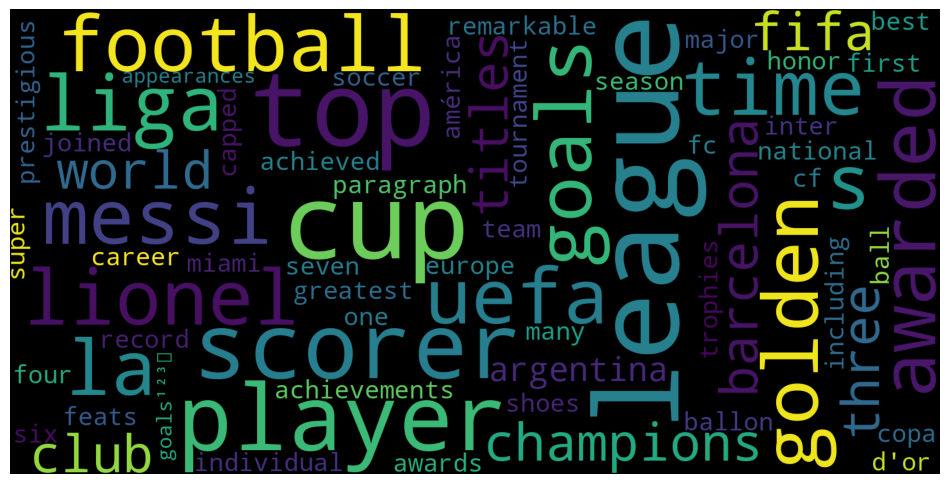

In [30]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
class WordCloudGeneration:
  def preprocessing(self, data):
# convert all words to lowercase
    data = [item.lower() for item in data]
# load the stop_words of english
    stop_words = set(stopwords.words('english'))
 # concatenate all the data with spaces.
    paragraph = ' '.join(data)
 # tokenize the paragraph using the inbuilt tokenizer
    word_tokens = word_tokenize(paragraph)
 # filter words present in stopwords list
    preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
    print("\n Preprocessed Data: " ,preprocessed_data)
    return preprocessed_data
  def create_word_cloud(self, final_data):
 # initiate WordCloud object with parameters width, height, maximum font size and background color
 # call the generate method of WordCloud class to generate an image
    wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
    background_color="black").generate(final_data)
 # plt the image generated by WordCloud class
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
wordcloud_generator = WordCloudGeneration()
# you may uncomment the following line to use custom input
# input_text = input("Enter the text here: ")
input_text ='''
Lionel Messi is one of the greatest football players of all time. He has achieved many remarkable feats in his career, both with his clubs and his national team. Here is a paragraph on some of his achievements:
Lionel Messi has won a record seven Ballon d'Or awards, the most prestigious individual honor in football. He has also won six Golden Shoes, awarded to the top scorer in Europe's top leagues. He is the all-time top scorer in La Liga, with over 450 goals, and in the UEFA Champions League, with over 120 goals. He has won 34 trophies with FC Barcelona, including four Champions League titles and 10 La Liga titles. He has also won three FIFA Club World Cups and three UEFA Super Cups with Barcelona. In 2023, he joined Inter Miami CF in the Major League Soccer, where he won the Leagues Cup in his first season. With Argentina, he has won the Copa América in 2021 and the FIFA World Cup in 2022, where he was also awarded the Golden Ball as the best player of the tournament. He is Argentina's most capped player and top scorer, with over 170 appearances and over 100 goals¹²³⁴.
'''
input_text = input_text.split('.')
clean_data = wordcloud_generator.preprocessing(input_text)
wordcloud_generator.create_word_cloud(clean_data)
